In [ ]:
## Tutorial "linares plot"

In [1]:
from linares_plot import *

In [ ]:
# By doing so, you also import the most standard python libraries

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.patches import Rectangle
# import scikits.bootstrap as bootstraps
# from seaborn_sinaplot import sinaplot ## install it at https://github.com/mparker2/seaborn_sinaplot
# import numpy as np


In [ ]:
# It also sets a poster style for the plots (big labels)
# If you want to modify it is simple: change it in your notebook after importing linares_plot

## Style of poster for the plots
#sns.set_context("poster", font_scale=1.1) ## poster format
#sns.set_style("ticks")


In [2]:
## Load a standard dataset to make some plots
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
### What is linares plot?

## It mixes a SINAPLOT with a BOX
## The sinaplot allows a nice visualization of the distribution of the data (individual dots, not cumulative or violin)
## The box shows the statistic (default is the mean) and the confidence intervals done by bootstrap

##### It offers the option to chose bootstrap with the whole data or in a subject basis

## It offers multiple visualization options:
##### BOX
##### BOX FILLED
##### LINE
##### DOT


## It uses a very standard "seaborn notation"

In [ ]:
## Default values

#### You need to specify:
####### x (independent variable)
####### y (dependent variable)
####### df (dataframe)
####### order (order of the different categories of the x) --> LINARES PLOT IS FOR CONDITION COMPARISON, NOT FOR CONTINUOS DISPLAY
####### hue (if there is)
####### palette (colors to use, no default)


# linares_plot(x, y, df, palette, order, hue=None, hue_order=None, point_size=1, alpha=0.4, CI=0.95,
#                   width=0.6, statistic=np.mean, by_subj=False, subj_col=None, plot_box=True, MS=12, LW=4, 
#                   reps=10000, leg=True, fill_box=False, alpha_box=1, sep_axis=True, L_size=16, loc_l='best')


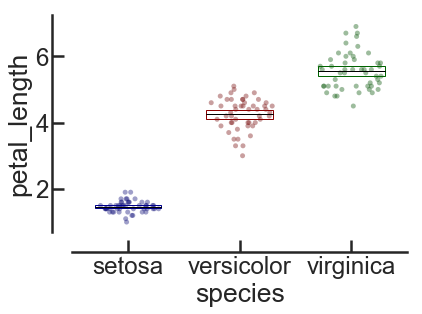

In [9]:
linares_plot(x='species', y='petal_length', df=iris, 
             palette=['darkblue', 'darkred', 'darkgreen'],  
             order=iris.species.unique(), 
             point_size=5)

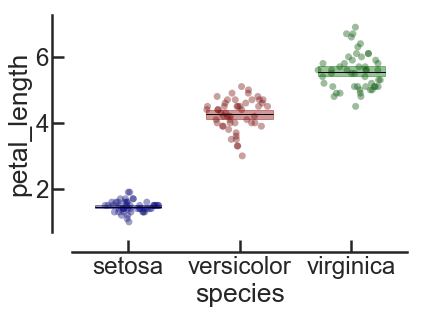

In [11]:
#### Change pointsize
#### FILL BOX

linares_plot(x='species', y='petal_length', df=iris, 
             palette=['darkblue', 'darkred', 'darkgreen'],  
             order=iris.species.unique(), 
             point_size=7,
             fill_box=True, alpha_box=0.4)

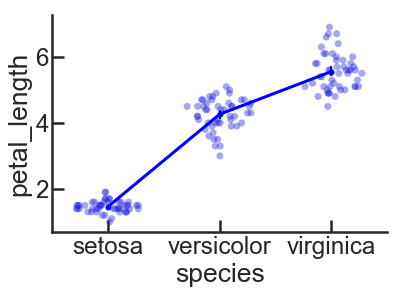

In [24]:
#### Change pointsize
#### LINE
#### Do not separate x axis

linares_plot(x='species', y='petal_length', df=iris, 
             palette=['blue'],  
             order=iris.species.unique(), 
             point_size=7,
             plot_box='line',  MS=5, LW=2,
             sep_axis=False)

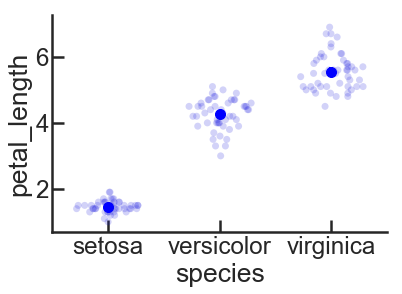

In [28]:
#### Change pointsize
#### POINT (mean)
#### Do not separate x axis
#### Change alpha points

linares_plot(x='species', y='petal_length', df=iris, 
             palette=['blue'],  
             order=iris.species.unique(), 
             point_size=7,
             plot_box='mean',  MS=10,
             sep_axis=False,
             alpha=0.2)

In [41]:
### HUEs
### Add a column to have more than one category
height = [np.random.choice(['tall', 'short']) for i in range(len(iris)) ]
iris['height'] = height
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,height
0,5.1,3.5,1.4,0.2,setosa,tall
1,4.9,3.0,1.4,0.2,setosa,short
2,4.7,3.2,1.3,0.2,setosa,tall
3,4.6,3.1,1.5,0.2,setosa,short
4,5.0,3.6,1.4,0.2,setosa,tall


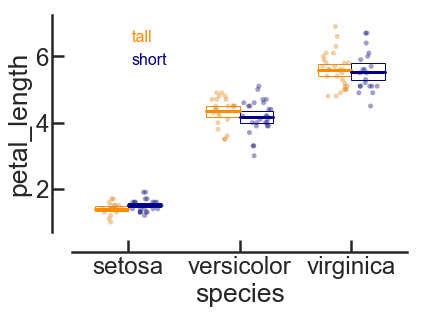

In [43]:
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(), 
             point_size=5)

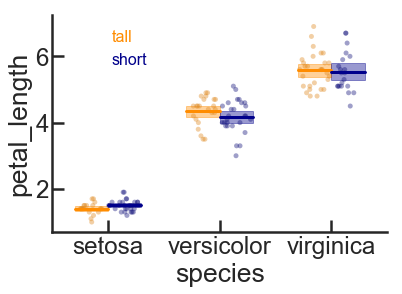

In [46]:
### fill box
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(), 
             point_size=5,
             fill_box=True, alpha_box=0.4,
             sep_axis=False)

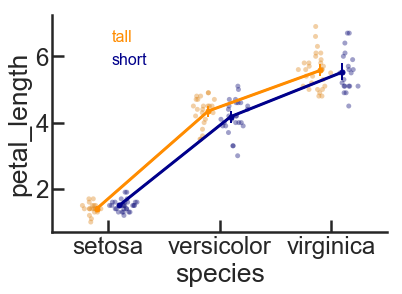

In [47]:
### line
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(),
             point_size=5,
             plot_box='line',  MS=5, LW=2,
             sep_axis=False)

In [54]:
#### Bootstrap options
#### keep the "subject structure" --> instead of mixing all trials, you mix the subjects and one one subject is picked, all the 
#### trials of this subjects enters in the bootstrap (corrects for different some subjects having more trials than others: in a 
#### random pick they will be under-represented)

#### imagine we have 5 flowers that change of species (absurd, I know...)
### Add a column to have more than one category
individu = [np.random.choice([1,2,3,4,5]) for i in range(len(iris)) ]
iris['individu'] = individu
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,height,individu
0,5.1,3.5,1.4,0.2,setosa,tall,2
1,4.9,3.0,1.4,0.2,setosa,short,5
2,4.7,3.2,1.3,0.2,setosa,tall,5
3,4.6,3.1,1.5,0.2,setosa,short,3
4,5.0,3.6,1.4,0.2,setosa,tall,1


In [ ]:
### bootstrap "by subject"
### Each point is the mean of each subject
linares_plot(x='species', y='petal_length', 
             hue='height', hue_order=['tall', 'short'], df=iris, 
             palette=['darkorange', 'darkblue'],  
             order=iris.species.unique(), 
             by_subj=True, subj_col='individu',
             point_size=8,
             fill_box=True, alpha_box=0.4,
             sep_axis=False)